In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("financial_risk_assessment.csv")


Jumlah nilai yang hilang per kolom:
Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64

Jumlah baris duplikat:
0


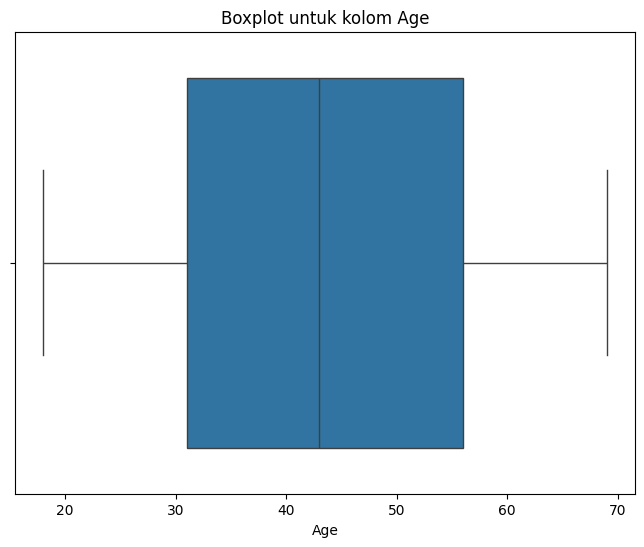

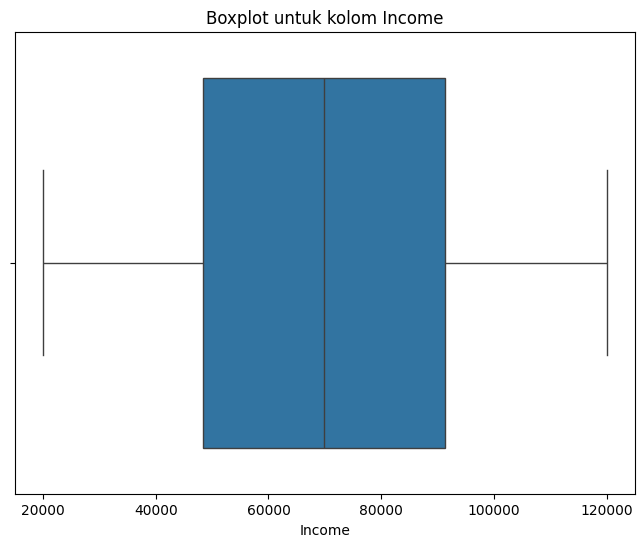

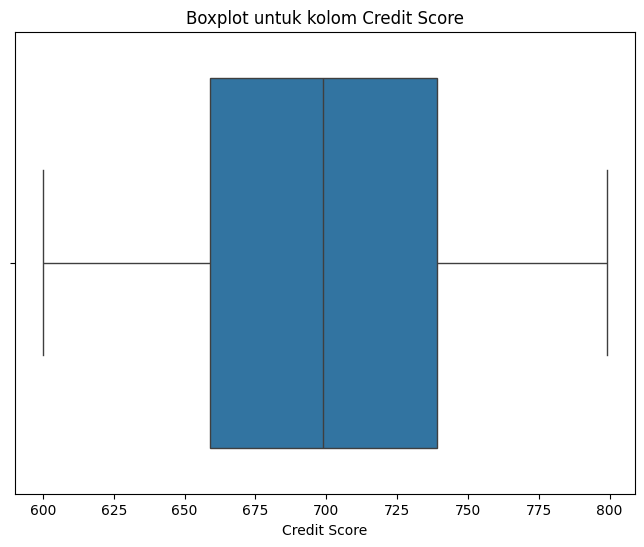

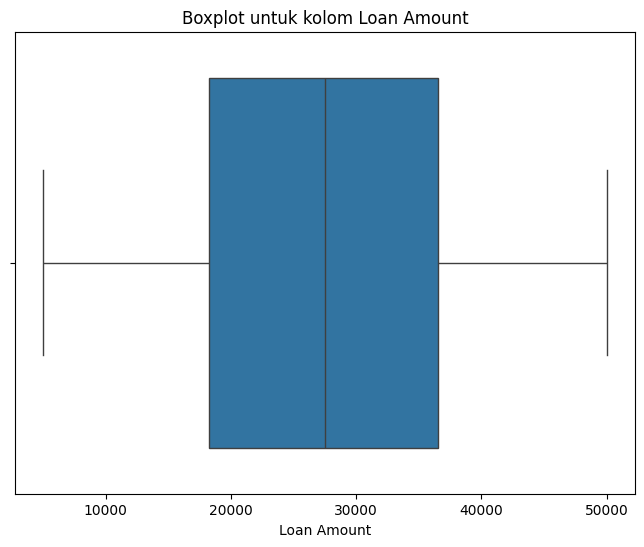

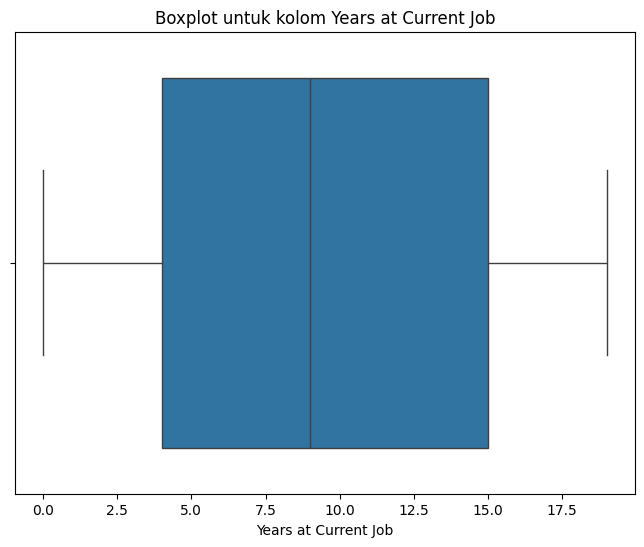

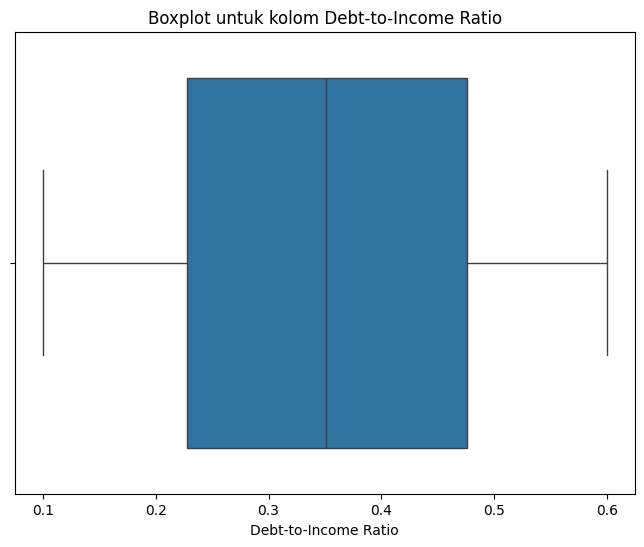

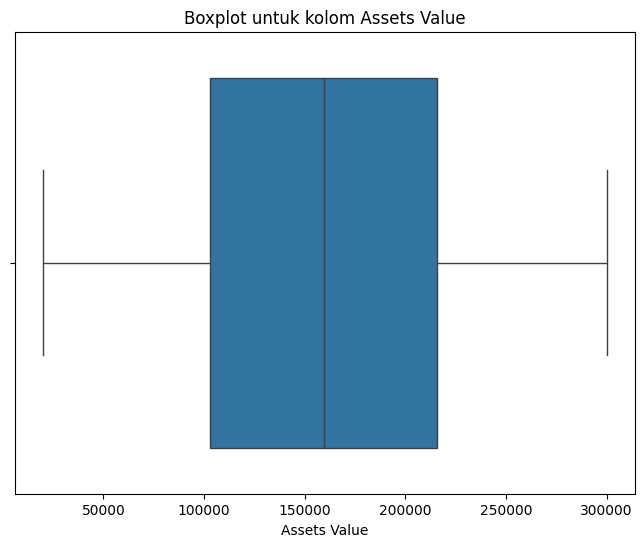

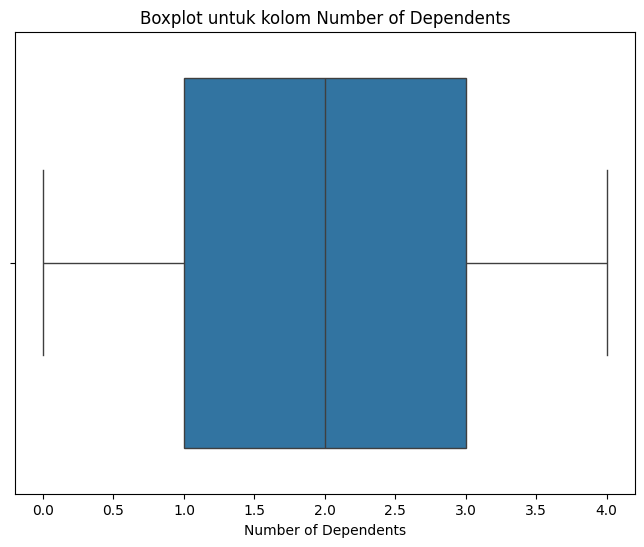

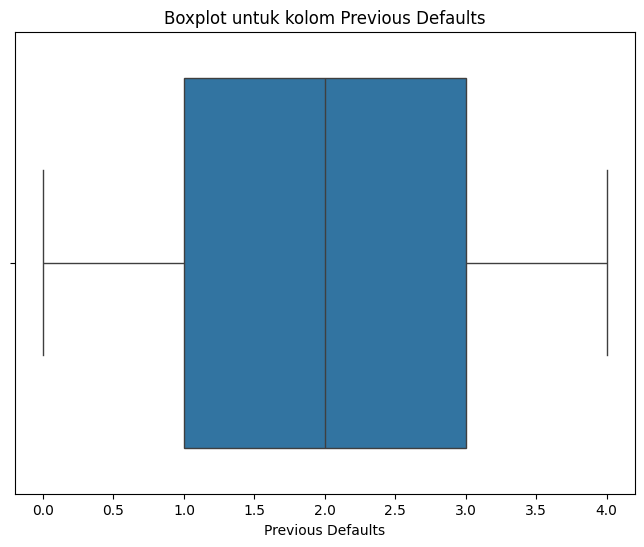

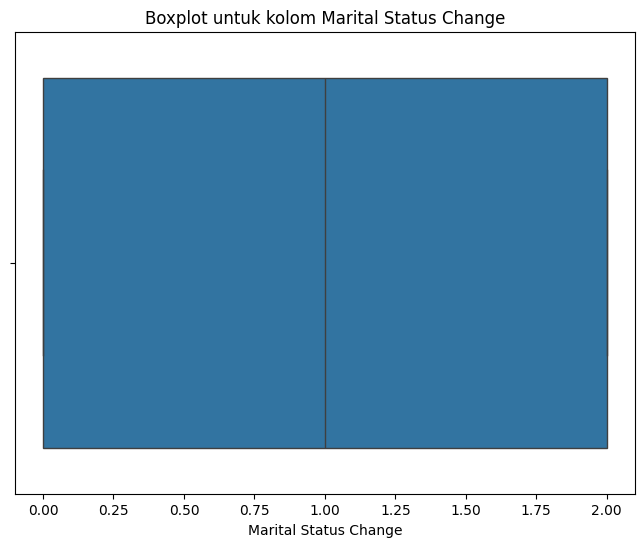


Informasi data setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  float64
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 15000 non-null  float64
 5   Credit Score           15000 non-null  float64
 6   Loan Amount            15000 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  float64
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           15000 non-null  float64
 13  Number of Dependents   15000 non-null  float64
 14  City                

In [35]:

# Menangani nilai yang hilang (Missing Value)
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Mengisi nilai yang hilang dengan mean atau median (sesuaikan dengan tipe data)
for column in df.columns:
  if df[column].dtype in ['float64', 'int64']:
    df[column].fillna(df[column].median(), inplace=True)  # Mengisi dengan median
  else:
    df[column].fillna(df[column].mode()[0], inplace=True) # Mengisi dengan modus


# Menangani nilai duplikat (Duplicate Value)
print("\nJumlah baris duplikat:")
print(df.duplicated().sum())

# Menghapus baris duplikat
df.drop_duplicates(inplace=True)

# Menangani outlier dengan boxplot
# Loop melalui kolom numerik
for column in df.select_dtypes(include=np.number).columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Boxplot untuk kolom {column}")
  plt.show()

  # Menentukan batas atas dan bawah untuk outlier (menggunakan IQR)
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Mengganti outlier dengan batas atas/bawah (sesuaikan dengan kebutuhan)
  df[column] = np.where(df[column] > upper_bound, upper_bound,
                         np.where(df[column] < lower_bound, lower_bound, df[column]))


# Periksa kembali data setelah cleaning
print("\nInformasi data setelah cleaning:")
print(df.info())
print("\nJumlah nilai yang hilang setelah cleaning:")
print(df.isnull().sum())
print("\nJumlah baris duplikat setelah cleaning:")
print(df.duplicated().sum())


Pada tahap ini kita akan mengecek dan menghandling missing value, duplicate value dan outlier. jika terdapat pada dataset tersebut, maka akan langsgung di eksekusi.

In [36]:
# Pilih kolom numerik yang akan dinormalisasi
numeric_cols = df.select_dtypes(include=np.number).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom numerik
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Tampilkan data setelah normalisasi
df.head()


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,0.607843,Male,PhD,Divorced,0.527982,0.442211,0.904774,Business,Unemployed,1.000000,Poor,0.108626,0.357832,0.00,Port Elizabeth,AS,Cyprus,0.50,1.0,Low
1,0.764706,Female,Bachelor's,Widowed,0.497720,0.452261,0.640806,Auto,Employed,0.315789,Fair,0.097838,0.127861,0.00,North Catherine,OH,Turkmenistan,0.75,1.0,Medium
2,0.058824,Non-binary,Master's,Single,0.356849,0.000000,0.702765,Home,Employed,0.421053,Fair,0.524824,0.573847,0.75,South Scott,OK,Luxembourg,0.75,1.0,Medium
3,0.803922,Male,Bachelor's,Single,0.065035,0.110553,0.478710,Personal,Unemployed,0.105263,Excellent,0.709969,0.490327,0.75,Robinhaven,PR,Uganda,1.00,1.0,Medium
4,0.137255,Non-binary,Bachelor's,Widowed,0.294244,0.834171,0.700653,Personal,Unemployed,0.526316,Fair,0.086482,0.954066,0.50,New Heather,IL,Namibia,0.75,0.5,Low


pada kode ini kita melakukan normalisasi dengan mentransformasi nilai kolom numerik menjadi rentang tertentu dengan metode minmaxscaler.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
# Deklarasikan kelas OrdinalEncoder dan lakukan transformasi pada kolom yang ingin diubah
encoder = OrdinalEncoder()
df["Gender"] = encoder.fit_transform(df[["Gender"]])
df.head(20)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,1.0,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,0.0,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,2.0,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,1.0,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,2.0,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,2.0,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,2.0,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,1.0,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,2.0,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,1.0,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


pada kode ini kita menggunakan ordinal-encoding untuk mengubah gender menjadi nilai numerik

gender

Female = 0

Male = 1

Non-binary = 2

In [24]:
# Feature Engineering: Kategori Income
def categorize_income(income):
  if income <= 50000:
    return 'Low'
  elif income <= 100000:
    return 'Medium'
  else:
    return 'High'

df['Income_Category'] = df['Income'].apply(categorize_income)

# Tampilkan data setelah feature engineering
df.head()


,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,...,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating,Income_Category
0,49,1.0,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,...,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low,Medium
1,57,0.0,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,...,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium,High
2,21,2.0,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,...,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium,Medium
3,59,1.0,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,...,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium,Low
4,25,2.0,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,...,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low,Low


pada kode ini kita membuat kolom baru dengan nama income_category, ini untuk mengelompokkan income dari tiap row. jadi row yang memiliki income kurang dari sama dengan 50000 termasuk low, kurang dari sama dengan 100000 termasuk Medium, dan sisanya adalah high.

In [27]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('Credit Score', axis=1)
y = df['Credit Score']

# Bagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran data training dan data testing
print("Ukuran data training:", X_train.shape, y_train.shape)
print("Ukuran data testing:", X_test.shape, y_test.shape)


Ukuran data training: (12000, 20) (12000,)
Ukuran data testing: (3000, 20) (3000,)


pada kode ini kita akan splitting data untuk training dan testing, jadi data ini kita pisahkan menjadi 2 bagian, yaitu 80% untuk training dan 20% nya untuk testing.